In [149]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.patches as mpatches
from sklearn import linear_model, tree
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from random import randint, choice, choices

In [150]:
df = pd.read_excel('../Pumpkin_Seeds_Dataset.xlsx')

In [151]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


<h1>Data Preprocessing & Scaling</h1>

In [152]:
label = LabelEncoder()
df['Target'] = pd.Series(label.fit_transform(df['Class']))

In [153]:
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
Target               0
dtype: int64

In [154]:
df.duplicated().sum()

0

In [155]:
df.groupby('Class').mean()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Target
Class,,,,,,,,,,,,,
Çerçevelik,78423.154615,1089.522488,426.272615,234.776929,79286.488462,315.193332,0.830538,0.989080,0.707018,0.827499,1.822609,0.741163,0.0
Ürgüp Sivrisi,83079.542500,1174.431919,489.458501,216.064413,83914.813333,323.820202,0.893749,0.989938,0.678240,0.752570,2.279054,0.663991,1.0


In [156]:
df = df.sample(frac=1)

In [157]:
df = df.drop('Class', axis=1)

In [158]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(df.drop('Target', axis=1))

<h1>Modeling</h1>

In [159]:
x_train, x_test, y_train, y_test = train_test_split(scaled_train, df['Target'],  test_size=0.2) 

In [160]:
models = []
scores = []

for x in range(3, 15):
    model = KNeighborsClassifier(n_neighbors=x)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    scores.append(score)
    models.append(model)

print(f"Best score is {max(scores)}")

Best score is 0.874


In [161]:
best_model = models[scores.index(max(scores))]

In [162]:
y_predicted = best_model.predict(x_test)

In [163]:
conf_matrix = confusion_matrix(y_predict, y_test)
conf_matrix

array([[159, 175],
       [ 97,  69]], dtype=int64)

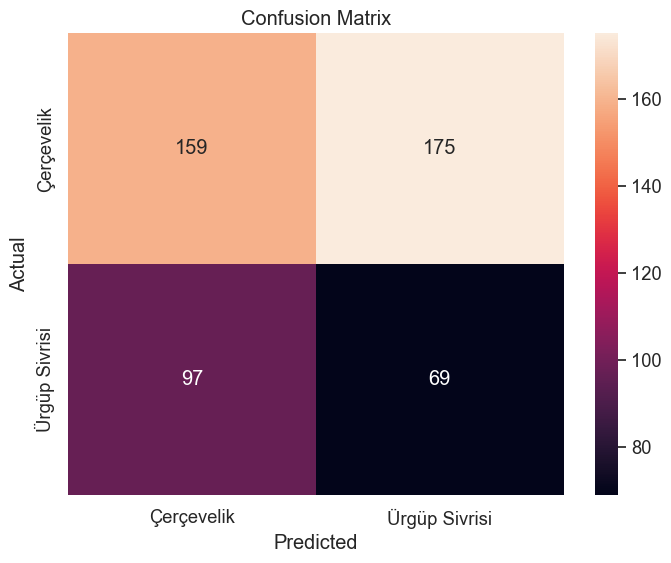

In [167]:
class_labels = ['Çerçevelik', 'Ürgüp Sivrisi']

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size as needed

# Create the heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d",
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()